In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wn
wn.filterwarnings('ignore')

In [3]:
path_root = "/kaggle/input/"
seed = 394

# Dataset Description

* **id**: Unique identifier for each record.
* **CustomerId:** Unique identifier for each customer.
* **Surname:** Last name of the customer.
* **CreditScore:** Credit score of the customer.
* **Geography:** Country where the customer is located (France, Spain, or Germany).
* **Gender:** Gender of the customer (Male or Female).
* **Age:** Age of the customer.
* **Tenure:** Number of years the customer has been with the bank.
* **Balance:** Account balance of the customer.
* **NumOfProducts:** Number of bank products the customer has.
* **HasCrCard:** Whether the customer has a credit card (1 if yes, 0 if no).
* **IsActiveMember:** Whether the customer is an active member (1 if yes, 0 if no).
* **EstimatedSalary:** Estimated salary of the customer.
* **Exited:** Whether the customer has churned (1 if yes, 0 if no)

In [3]:
train_df = pd.read_csv("/home/junaidulhassan/LangchainProjects/dataset/Churn_analysis_dataset.csv")
#test_df = pd.read_csv(path_root+"playground-series-s4e1/test.csv")

In [4]:
train_df.shape

(165034, 14)

In [6]:
train_df.isnull().sum()*100/train_df.shape[0]

id                 0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [7]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


# Feature Engineering

In [8]:
train_df.drop(['id','Surname','CustomerId'],axis=1,inplace=True)
# test_df.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [9]:
train_df['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [10]:
# Check the Correlation between the columns
numerical_train_df = train_df.select_dtypes(include=['float', 'int'])
corr=numerical_train_df.corr()

<Axes: >

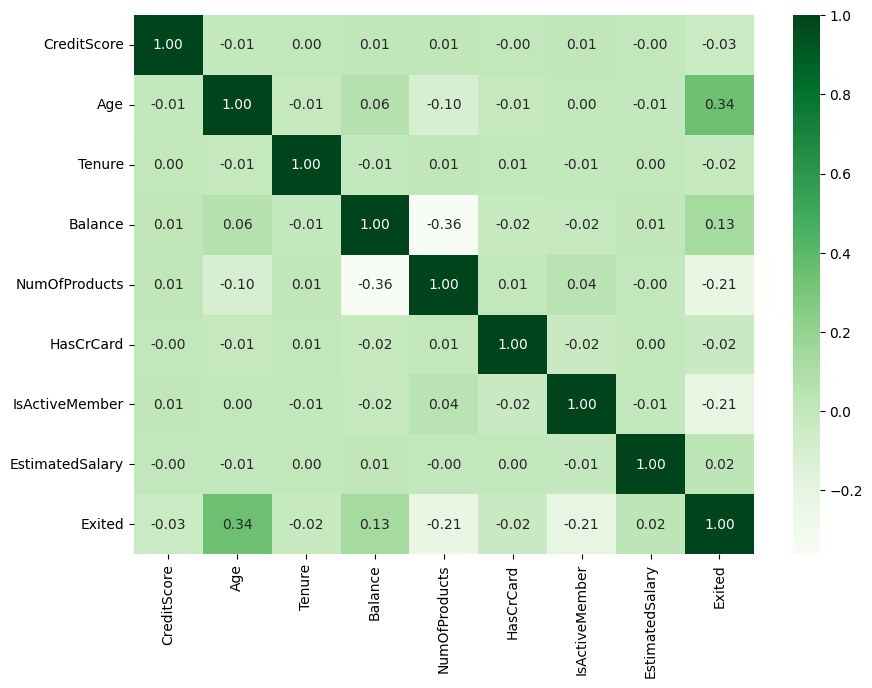

In [11]:
#Draw heatmap for better understandings
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='Greens')

# Data Analysis 

In [12]:
traffic_location_cal = train_df.groupby(['Geography','Gender']).size().unstack()

<Figure size 1000x700 with 0 Axes>

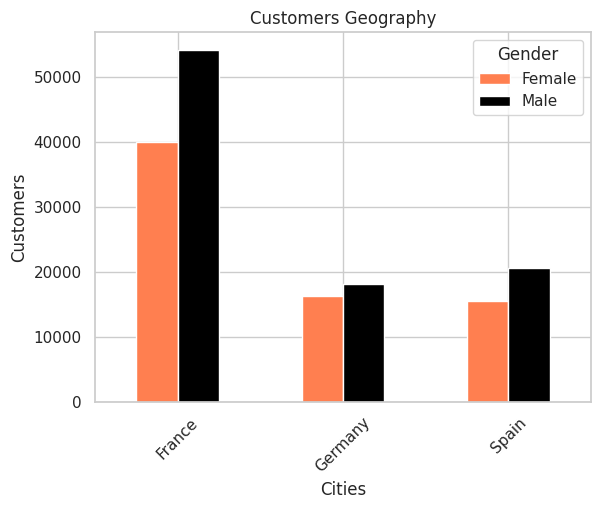

In [13]:
sns.set(style=('whitegrid'))
plt.figure(figsize=(10, 7))
traffic_location_cal.plot(kind='bar',color=['coral','black'])
plt.title('Customers Geography')
plt.xlabel('Cities')
plt.ylabel('Customers')
plt.xticks(rotation=45)
plt.show();

Let's visualize the relationship between "Age" and "CreditScore"

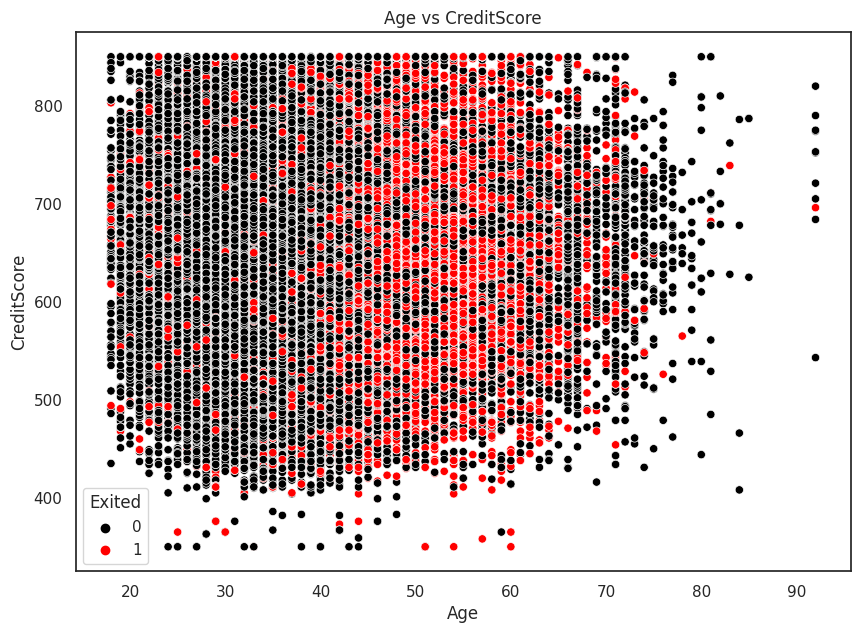

In [14]:
plt.figure(figsize=(10,7))
sns.set(style=('white'))
sns.scatterplot(data=train_df, x="Age", y="CreditScore",
                hue=train_df['Exited'], palette=['black','red'])
plt.title("Age vs CreditScore")
plt.show()

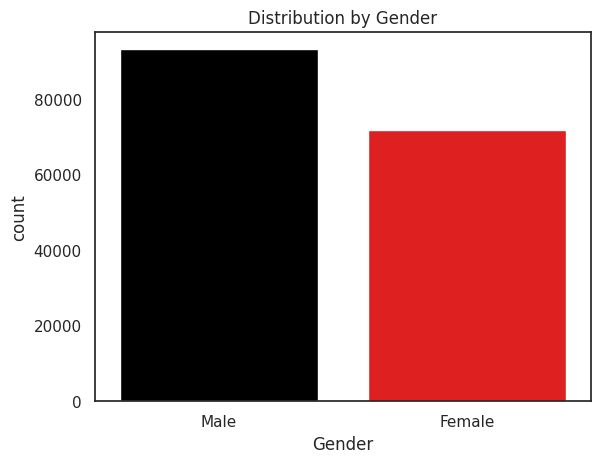

In [15]:
# Distribution by Gender
sns.countplot(data=train_df, x="Gender",palette=['black','red'])
plt.title("Distribution by Gender")
plt.show()

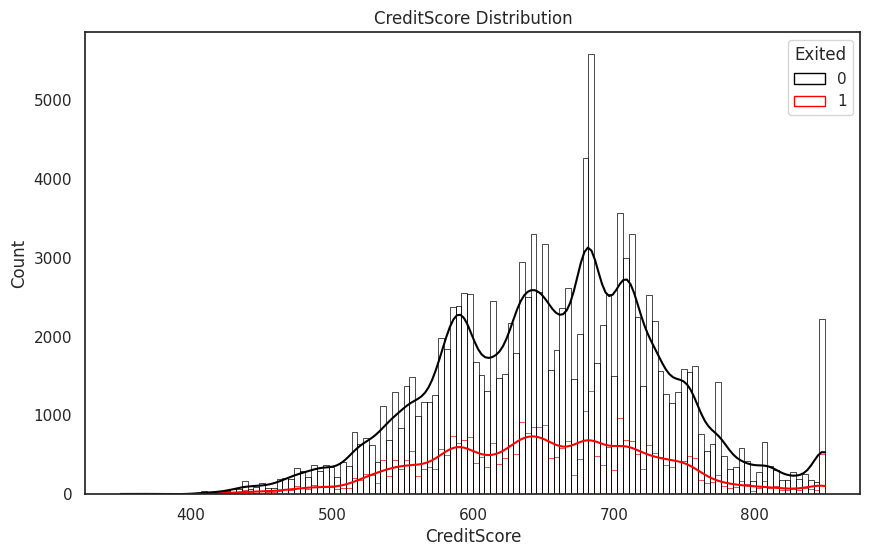

In [16]:
# credit Score Distribution
plt.figure(figsize=(10,6))
sns.histplot(data=train_df, x="CreditScore", kde=True,fill=False,
             hue=train_df['Exited'],palette=['black','red'])
plt.title("CreditScore Distribution")
plt.show()

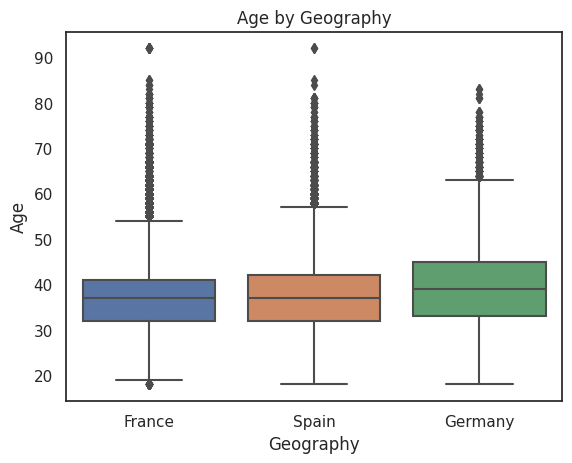

In [17]:
sns.boxplot(data=train_df, x="Geography", y="Age")
plt.title("Age by Geography")
plt.show()

# Data Preprocessing

In [18]:
# now create a Pipeline for prediction
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [19]:
train_df.shape

(165034, 11)

In [20]:
x= train_df.drop('Exited',axis=1)
y = train_df['Exited']

In [21]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
model = GradientBoostingClassifier()

In [24]:
oneHotEncode_df = ColumnTransformer([
    ('oneHotEncode', OneHotEncoder(handle_unknown='ignore',sparse=False), [1, 2])
], remainder='passthrough')

In [25]:
applyScal = ColumnTransformer([
    ('scalar',MinMaxScaler(),slice(0,13))
],remainder='passthrough')

In [26]:
applyStdScal = ColumnTransformer([
    ('Stdscalar',StandardScaler(),slice(0,12))
],remainder='passthrough')

In [27]:
pipe = Pipeline([
    ('oneHotEncoder',oneHotEncode_df),
    #('MinMaxScaler',applyScal)
    ('StdScaler',applyStdScal),
    ('model',model)
])

In [28]:
pipe

Pipeline(steps=[('oneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oneHotEncode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2])])),
                ('StdScaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Stdscalar', StandardScaler(),
                                                  slice(0, 12, None))])),
                ('model', GradientBoostingClassifier())])

In [30]:
x.shape,y.shape

((165034, 10), (165034,))

In [53]:
x = np.array(x)
y = np.array(y)

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [55]:
x_train.shape,x_test.shape

((132027, 10), (33007, 10))

In [56]:
x_train

array([[670, 'Germany', 'Female', ..., 1.0, 0.0, 87566.97],
       [636, 'France', 'Male', ..., 1.0, 1.0, 151623.91],
       [679, 'France', 'Male', ..., 1.0, 0.0, 178038.17],
       ...,
       [667, 'France', 'Female', ..., 1.0, 1.0, 73963.17],
       [542, 'Spain', 'Female', ..., 0.0, 1.0, 49594.02],
       [703, 'France', 'Male', ..., 0.0, 1.0, 85547.33]], dtype=object)

In [57]:
# clf = LazyClassifier(ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(x_train, x_test, y_train, y_test)

In [58]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('oneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oneHotEncode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2])])),
                ('StdScaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Stdscalar', StandardScaler(),
                                                  slice(0, 12, None))])),
                ('model', GradientBoostingClassifier())])

In [59]:
pipe.score(x_test,y_test)

0.8618171902929681

In [60]:
import pickle
with open('production_pipeline.pkl','wb') as file:
    pickle.dump(pipe,file)

# Data Modeling

In [45]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc

In [46]:
def train_classification_models(x_train, y_train):
    models = {
        'RandomForest': RandomForestClassifier(),
        'GradientBoosting': GradientBoostingClassifier(),
        'NaiveBayes': GaussianNB(),
        'NeuralNetwork': MLPClassifier(),
        'KNeighbors': KNeighborsClassifier(),
        'DecisionTree': DecisionTreeClassifier()
    }

    trained_models = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        trained_models[name] = model
    return trained_models

In [47]:
trained_models = train_classification_models(x_train,y_train)

In [48]:
trained_models

{'RandomForest': RandomForestClassifier(),
 'GradientBoosting': GradientBoostingClassifier(),
 'NaiveBayes': GaussianNB(),
 'NeuralNetwork': MLPClassifier(),
 'KNeighbors': KNeighborsClassifier(),
 'DecisionTree': DecisionTreeClassifier()}

In [49]:
def evaluate_classification_models(x_test, y_test, trained_models):
    results = []

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for i, (name, model) in enumerate(trained_models.items()):
        y_pred = model.predict(x_test)
        score = model.score(x_test, y_test)
        cm = confusion_matrix(y_test, y_pred)

        results.append({'model_name': name, 'score': score})

        # Plotting confusion matrix as a heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'{name}\nAccuracy: {score:.2f}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

    results_df = pd.DataFrame(results)
    return results_df

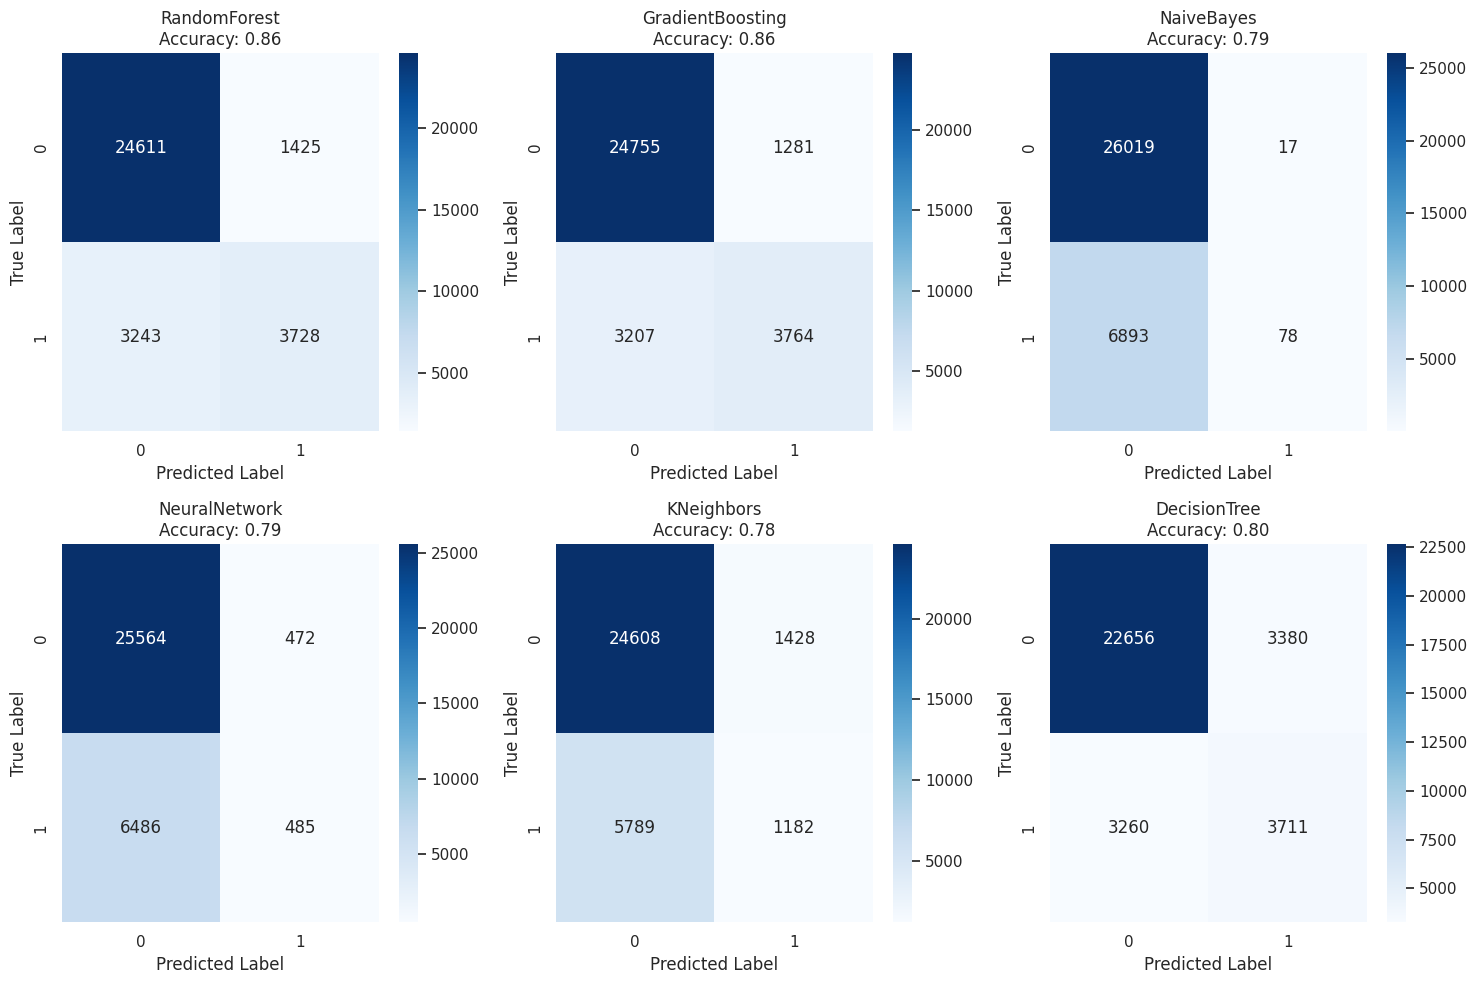

,model_name,score
0,RandomForest,0.858575
1,GradientBoosting,0.864029
2,NaiveBayes,0.790650
3,NeuralNetwork,0.789196
4,KNeighbors,0.781349
5,DecisionTree,0.798831


In [51]:
evaluate_classification_models(x_test,y_test,trained_models)

In [52]:
trained_models['GradientBoosting'].predict_proba(x_test)

array([[0.91262916, 0.08737084],
       [0.93434035, 0.06565965],
       [0.97906222, 0.02093778],
       ...,
       [0.09035281, 0.90964719],
       [0.84635674, 0.15364326],
       [0.07840399, 0.92159601]])

In [54]:
import pickle
model = trained_models['GradientBoosting']
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Predictive Analysis

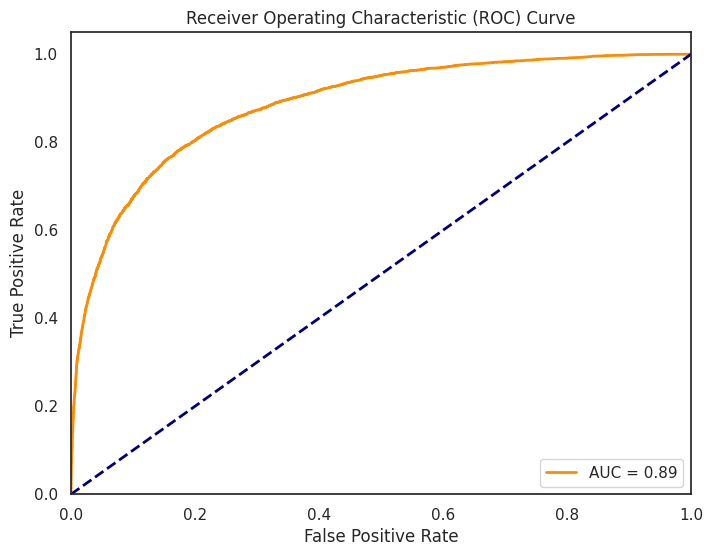

In [53]:
y_probabilities = trained_models['GradientBoosting'].predict_proba(x_test)[:, 1]  # Probabilities of the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Apply Model on Test set

In [16]:
import pickle

with open('/home/junaidulhassan/LangchainProjects/Jupyter_notebook/production_pipeline.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [9]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [64]:
arr = np.array(x_test)[0]

In [68]:
arr = arr.reshape(1,-1)

In [69]:
loaded_model.predict(arr)

array([0])

In [11]:
credits_score = int(input("CreditScore: "))
geography = input("Geography: ")
gender = input("Gender: ")
age = int(input("Age: "))
tenure = int(input("Tenure: "))
balance = float(input("Balance: "))
num_of_prod = int(input("Number of Productions"))
hasCredit_Card = float(input("Has credit Card: "))
isActiveMem = int(input("Is Active Memeber: "))
Estimated_salary = float(input("Estimated Salary: "))

In [12]:
arr = np.array([credits_score,geography,gender,age,tenure,balance,num_of_prod,hasCredit_Card,isActiveMem,Estimated_salary])

In [18]:
arr = arr.reshape(1,-1)

In [19]:
loaded_model.predict(arr)

array([1])

In [32]:
pred = loaded_model.predict_proba(arr)

In [33]:
pred[0][1]

0.8930480739963321

In [22]:
train_df['Geography'].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64